In [1]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam", "toy"]:
        data = np.load(f"../data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)



loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4171, 32)
training_labels (4171,)

loaded toy data!
test_data (0,)
training_data (1000, 2)
training_labels (1000,)


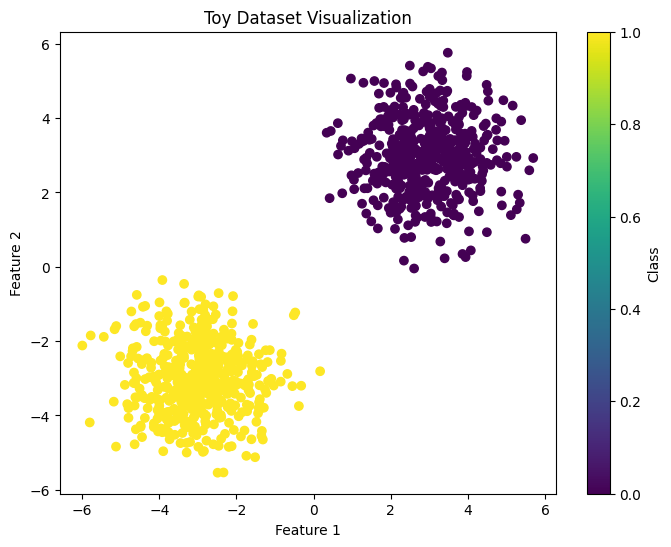

In [2]:
# Load toy dataset
toy_data = np.load("../data/toy-data.npz")
X = toy_data["training_data"]
y = toy_data["training_labels"]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy Dataset Visualization')
plt.show()

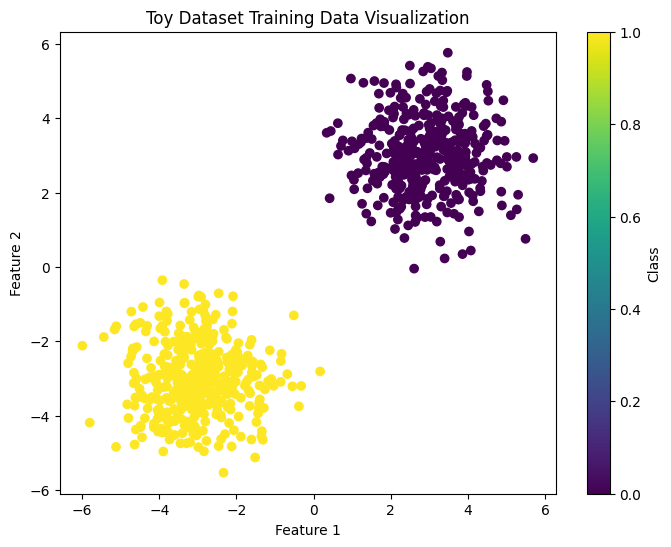

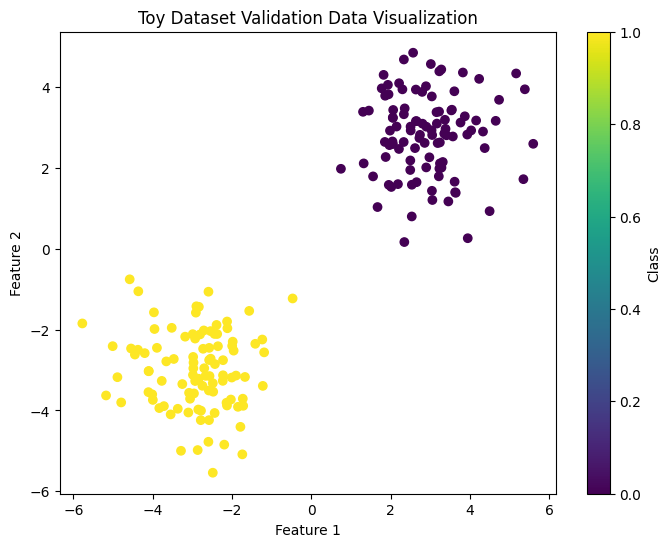

In [3]:
# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split into training and validation sets (80/20 split)
split_index = int(0.8 * X.shape[0])
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Create scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy Dataset Training Data Visualization')
plt.show()

# Create scatter plot for validation data
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='viridis')
plt.colorbar(label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy Dataset Validation Data Visualization')
plt.show()

Validation Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



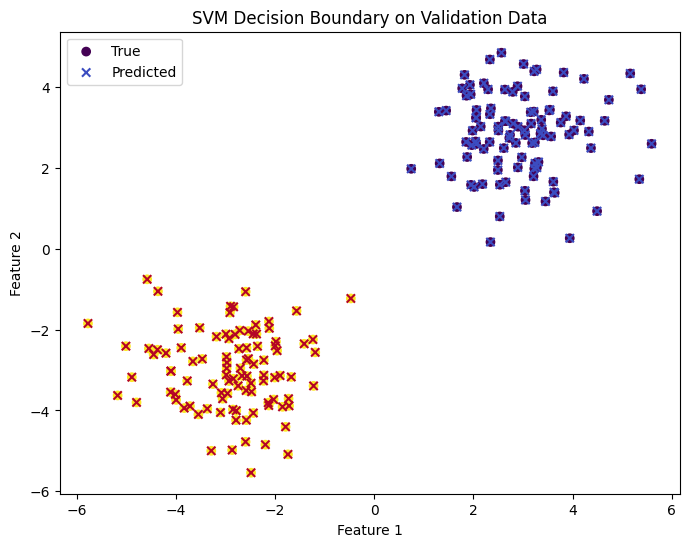

In [4]:
# Import SVM from sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM on the training data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Visualize decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='viridis', marker='o', label='True')
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val_pred, cmap='coolwarm', marker='x', label='Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary on Validation Data')
plt.legend()
plt.show()

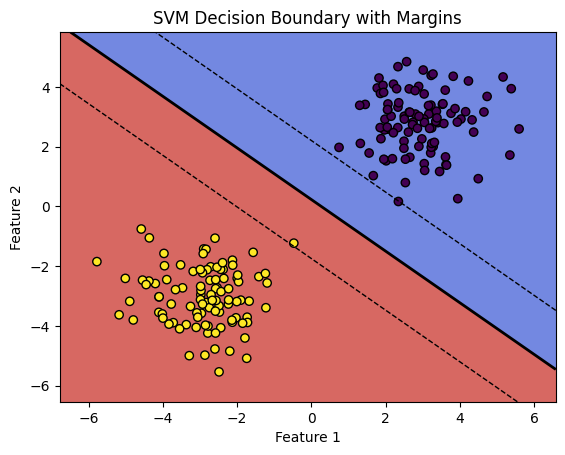

In [5]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    # Create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Get the separating hyperplane
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Get the decision function values for the mesh
    Z_decision = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z_decision = Z_decision.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    plt.contour(xx, yy, Z_decision, levels=[-1, 0, 1], colors=['k', 'k', 'k'], 
                linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with Margins')
    plt.show()

# Plot decision boundary for validation data
plot_decision_boundary(svm_model, X_val, y_val)